### 情感分析

In [1]:
from transformers import pipeline

# 创建情感分析 pipeline，默认使用 bert-base-uncased 模型
sentiment_pipeline = pipeline("sentiment-analysis")

# 你可以尝试不同的文本
text1 = "I love using Hugging Face Transformers!"
text2 = "This is the worst experience ever."

result1 = sentiment_pipeline(text1)
result2 = sentiment_pipeline(text2)

print(f"文本1: '{text1}' 的情感分析结果: {result1}")
print(f"文本2: '{text2}' 的情感分析结果: {result2}")

d:\pycharm\myPrograms\pythonProject\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
d:\pycharm\myPrograms\pythonProject\venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in E:\HuggingFace\Transformers_CACHE\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space 

Device set to use cpu


文本1: 'I love using Hugging Face Transformers!' 的情感分析结果: [{'label': 'POSITIVE', 'score': 0.9971315860748291}]
文本2: 'This is the worst experience ever.' 的情感分析结果: [{'label': 'NEGATIVE', 'score': 0.9997727274894714}]


### 文本分类

In [2]:
from transformers import pipeline

# 创建文本分类 pipeline，可以指定模型，这里使用 zero-shot-classification 模型
classifier = pipeline("zero-shot-classification")

text = "This is a great article about the latest advancements in artificial intelligence."
candidate_labels = ["technology", "politics", "sports"]

result = classifier(text, candidate_labels)

print(f"文本: '{text}' 的文本分类结果: {result}")

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
d:\pycharm\myPrograms\pythonProject\venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in E:\HuggingFace\Transformers_CACHE\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this a

文本: 'This is a great article about the latest advancements in artificial intelligence.' 的文本分类结果: {'sequence': 'This is a great article about the latest advancements in artificial intelligence.', 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9904248714447021, 0.0058543868362903595, 0.0037207016721367836]}


### 问答系统

In [ ]:
from transformers import pipeline

# 创建问答 pipeline，默认使用 bert-large-uncased-whole-word-masking-finetuned-squad 模型
question_answerer = pipeline("question-answering")

context = """
Transformers are deep learning models that have revolutionized the field of Natural Language Processing (NLP). They were introduced in the paper "Attention is All You Need" by Vaswani et al. in 2017.  Transformers excel at handling sequential data and have become the dominant architecture for many NLP tasks.
"""
question = "When were Transformers introduced?"

result = question_answerer(question=question, context=context)

print(f"问题: '{question}' 的答案: {result}")

In [8]:
from transformers import pipeline
instruction_pipeline = pipeline('text-generation', model='vicgalle/gpt2-open-instruct-v1')
instruction = "Write a Python program to count the Pi"
parameters = {
    "max_length": 150,          # 最大生成长度
    "num_return_sequences": 1,  # 返回 1 个结果
    "temperature": 0.8,         # 适中的随机性
    "top_p": 0.9,              # 使用 top_p 采样
    "repetition_penalty": 1.1, # 稍微降低重复
    "do_sample": True,          # 使用采样策略
}
generated_texts = instruction_pipeline(instruction, **parameters)
print("Generated:\n\n")
print(generated_texts[0]['generated_text'])

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Generated:


Write a Python program to count the Pi and other hardware components. For example, you can print the number of digits from one digit to another in decimal format.

def pi(n):
  if n == 1: return 0
  elif n == 2 or n == 3: return 1
else: for i in range(2, int(math.sqrt((n-i)**2)+1)) + 1]: # calculate the Pi and other components
return pi * (n-i) ** 2 + 1

def pi(n):
  """ Calculates the Pi and other components
"""

print(pi(0)))

The above code prints out the number of digits from


### BertViz可视化

In [6]:
from transformers import BertTokenizer, BertModel
from bertviz import head_view, model_view

# 1. 加载预训练 BERT 模型和 tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# 2. 准备输入文本
text = "The quick brown fox jumps over the lazy dog."
inputs = tokenizer.encode(text, return_tensors='pt')  # 转换为 PyTorch Tensor

# 3. 获取与 `inputs` 对应的 token
tokens = tokenizer.convert_ids_to_tokens(inputs[0])  

# 4. 运行模型，获取注意力权重
outputs = model(inputs, output_attentions=True) 
attention = outputs.attentions  

# 5. 可视化注意力
head_view(attention, tokens)
model_view(attention, tokens)

print("BertViz 可视化已生成！请在 Notebook 中滚动查看！")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BertViz 可视化已生成！请在 Notebook 中滚动查看！


### SHAP可视化

In [24]:
import transformers
import shap
import matplotlib.pyplot as plt

# 加载情感分析 pipeline 模型
model = transformers.pipeline('sentiment-analysis')

# 创建 SHAP Explainer，传入 pipeline 模型
explainer = shap.Explainer(model)

# 红豆生南国，春来发几枝？
text = "Fallen leaves are dancing, The path keeps going on, Only shadow stays close."

# 计算 SHAP 值
shap_values = explainer([text]) #  注意这里输入的是一个包含单个文本的列表

# 绘制文本可视化图
shap.plots.text(shap_values[0]) #  shap_values 是列表，我们取第一个元素 (也是唯一元素)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


### CLIP模型

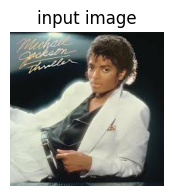


---------- Softmax之前的相似度 ----------
文本: 'a sport car driving on the road'  ->  相似度得分: 0.1361
文本: 'a black man wearing a white coat'  ->  相似度得分: 0.2385
文本: 'a girl laying on the grass'  ->  相似度得分: 0.1320
文本: 'Michael Jackson's album cover'  ->  相似度得分: 0.3253
文本: 'the Beatles' album cover'  ->  相似度得分: 0.1910

---------- 文本描述与图像的相似度概率 (Softmax后) ----------
文本: 'a sport car driving on the road'  ->  相似度概率: 0.1863
文本: 'a black man wearing a white coat'  ->  相似度概率: 0.2064
文本: 'a girl laying on the grass'  ->  相似度概率: 0.1855
文本: 'Michael Jackson's album cover'  ->  相似度概率: 0.2251
文本: 'the Beatles' album cover'  ->  相似度概率: 0.1968

---------- 最相关的文本描述 ----------
最相关的文本描述是: 'Michael Jackson's album cover'
相似度概率: 0.2251
----------------------------------------



In [12]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import matplotlib.pyplot as plt

# 1. 初始化CLIP模型和处理器
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# 2. 准备文本和图像
texts = [
    "a sport car driving on the road",
    "a black man wearing a white coat",
    "a girl laying on the grass",
    "Michael Jackson's album cover",
    "the Beatles' album cover"
]
image_path = r"C:\Users\hsung\Pictures\test.jpg"  # 请替换为您自己的图片路径
image = Image.open(image_path)

# 显示图片 (保持显示图片的代码)
plt.figure(figsize=(2, 2))
plt.imshow(image)
plt.axis('off')
plt.title('input image')
plt.show()

# 3. 处理输入并获取特征
inputs = processor(
    text=texts,
    images=image,
    return_tensors="pt",
    padding=True
)
outputs = model(**inputs)

# 4. 计算相似度
text_features = outputs.text_embeds
image_features = outputs.image_embeds

# 归一化特征
text_features = text_features / text_features.norm(dim=1, keepdim=True)
image_features = image_features / image_features.norm(dim=1, keepdim=True)

# 计算相似度 (Softmax之前)
similarity = torch.matmul(image_features, text_features.T)

# 5. 显示Softmax之前的相似度
print("\n---------- Softmax之前的相似度 ----------")
for i, text in enumerate(texts):
    print(f"文本: '{text}'  ->  相似度得分: {similarity[0, i]:.4f}")

# 6. 计算Softmax后的概率
probs = similarity.softmax(dim=1)

# 7. 打印Softmax后的结果 (优化显示)
print("\n---------- 文本描述与图像的相似度概率 (Softmax后) ----------")
for i, text in enumerate(texts):
    print(f"文本: '{text}'  ->  相似度概率: {probs[0, i]:.4f}")

# 8. 找出最匹配的文本描述 (优化显示)
max_prob_index = probs.argmax().item()
most_relevant_text = texts[max_prob_index]
max_probability = probs[0, max_prob_index].item()

print("\n---------- 最相关的文本描述 ----------")
print(f"最相关的文本描述是: '{most_relevant_text}'")
print(f"相似度概率: {max_probability:.4f}")
print("----------------------------------------\n")